# Pythonic code

파이썬 특유의 문법으로 효율적으로 코드를 표현. 

요즘은 많은 언어들이 서로 장점을 채용해서 비슷비슷해짐. 

Pythonic code를 쓰면
- 남들도 그렇게 쓰니까 다른 사람 코드 이해하기 좋다. 
- 효율이 더 좋다. 
- 내 코드가 깔끔해진다. 

## `split` & `join`

In [3]:
s = 'hello world foo bar cake egg ham'
s_l = s.split()
s_l

['hello', 'world', 'foo', 'bar', 'cake', 'egg', 'ham']

In [7]:
'$'.join(s_l)

'hello$world$foo$bar$cake$egg$ham'

## list comprehension

In [11]:
word_1 = 'hello'
word_2 = 'world'

l = [i+j for i in word_1 for j in word_2]
l

['hw',
 'ho',
 'hr',
 'hl',
 'hd',
 'ew',
 'eo',
 'er',
 'el',
 'ed',
 'lw',
 'lo',
 'lr',
 'll',
 'ld',
 'lw',
 'lo',
 'lr',
 'll',
 'ld',
 'ow',
 'oo',
 'or',
 'ol',
 'od']

In [12]:
# 2d array

l = [[i+j for i in word_1] for j in word_2]
l

[['hw', 'ew', 'lw', 'lw', 'ow'],
 ['ho', 'eo', 'lo', 'lo', 'oo'],
 ['hr', 'er', 'lr', 'lr', 'or'],
 ['hl', 'el', 'll', 'll', 'ol'],
 ['hd', 'ed', 'ld', 'ld', 'od']]

## `enuemrate`

## `zip`

## `lambda` & `map` & `reduce`

### `lambda`

이름없는 익명함수. 람다 대수에서 유래. 

Python 3부터는 PEP8에서 권장하지 않는다. 
- docstring 지원 안되고
- 테스트가 어렵고
- 문법이 어려울 수 있다. 

하지만 많이 쓰이긴 한다. 

In [13]:
# Dont' 
f = lambda x: 2*x

# Do
def f(x): return 2*x

### `map`

실행시점의 값을 생성해서 메모리효율적이다. 

하지만 만약 list comprehension으로 동일한 표현이 가능하다면, 그것이 더 권장된다. 

In [17]:
ex = [1, 2, 3, 4, 5]
def f(x):  return x ** 2

m = map(f, ex)
m

In [18]:
list(m)

[1, 4, 9, 16, 25]

### `reduce`

iterable이 주어지면 계속 함수를 적용해서 말 그대로 reduce 시키는 것이다. 

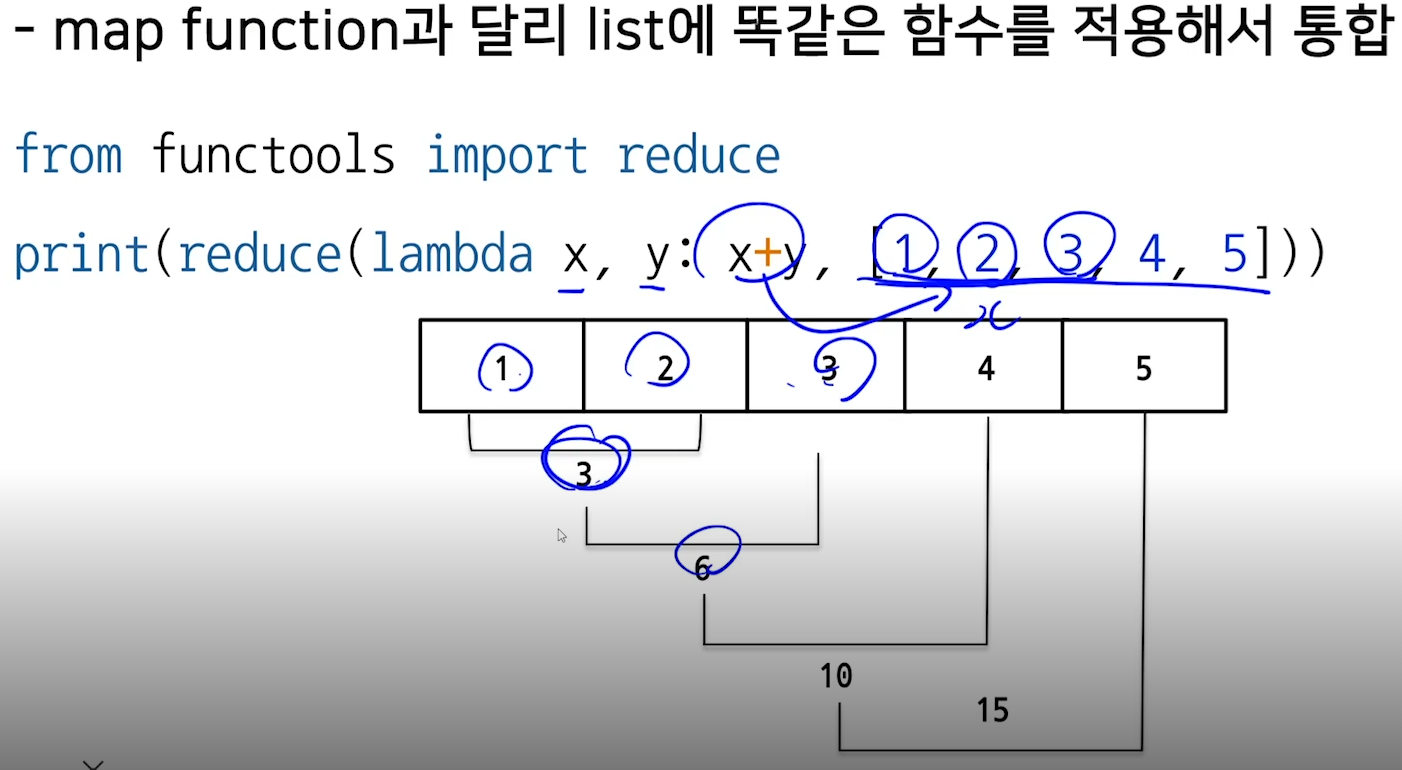

코드의 직관성이 떨어지는 이유 때문에 권장되진 않는다. 

하지만 다양한 머신러닝 코드에서 여전히 사용된다고 한다. 

In [24]:
from functools import reduce

def f(x, y): 
    print(x+y) 
    return x+y

reduce(f, [1,2,3,4,5])

3
6
10
15


15

## `generator`

iterables는 모두 내부적으로 `__iter__`과 `__next__` method를 가진다. 

`iter(foo_l)`를 하면 다음 메모리 위치 정보만 기억하고 아직 생성하진 않은 상태가 된다. 

(마치 단순연결리스트의 head와 같은 상태이다.)

이를 바탕으로 generator를 쓴다. 

In [26]:
cities_l = ['seoul', 'busan', 'jeju']

memory_address = iter(cities_l)
memory_address

In [27]:
next(memory_address)

'seoul'

In [28]:
next(memory_address)

'busan'

In [29]:
next(memory_address)

'jeju'

In [30]:
next(memory_address)

StopIteration: 

위와 같은 이유로 generator는 list에 비해 메모리를 아낄 수 있다. 

따라서 특히 대용량의 데이터를 메모리에 올려 처리해야 하거나 할 때는 generator를 적극적으로 사용한다. 

파일 io할 때도 generator를 사용한다. 

In [35]:
import sys

In [36]:
l = list(range(10000))
sys.getsizeof(l)

80056

In [37]:
def generator_list(length):
    for i in range(length):
        yield i

In [39]:
g = generator_list(10000)
sys.getsizeof(g) # length가 늘어나도 변하지 않는다. 계속 112이다. 

112

### generator comprehension

In [42]:
g = (x for x in range(10000))
type(g)

generator

## function passing arguments

### keyward arguments

In [43]:
def f(x, y, z):
    return 100*x + 10*y + z

In [44]:
f(y=1, x=5, z=3)

513

### default arguments 

default 값 설정

## asterisk

### variable length 

`*args` 
- tuple로 들어옴

`**kwargs`
- dict로 들어옴

### unpacking a container

In [61]:
def f(*args):
    print(type(args))
    return sum(args)

In [62]:
f(1, 2, 3, 4, 5)

<class 'tuple'>


15

In [63]:
t = (1, 2, 3, 4, 5)

f(*t)

<class 'tuple'>


15

In [64]:
def f(**kwargs):
    print(type(kwargs))
    return kwargs.items()

In [65]:
f(a=1, b=2, c=3)

<class 'dict'>


dict_items([('a', 1), ('b', 2), ('c', 3)])

In [66]:
d = {'a': 1, 'b': 2, 'c': 3}

f(**d)

<class 'dict'>


dict_items([('a', 1), ('b', 2), ('c', 3)])

In [67]:
ex = [
    [1, 2], 
    [3, 4], 
    [5, 6], 
    [7, 8], 
]

In [69]:
for value in zip(ex):
    print(value)

([1, 2],)
([3, 4],)
([5, 6],)
([7, 8],)


In [70]:
for value in zip(*ex):
    print(value)

(1, 3, 5, 7)
(2, 4, 6, 8)
